In [1]:
import pandas as pd
import numpy as np
import os

files = os.listdir('Mobility/dynamische_Verkehrsdaten/Test')

In [2]:
cols = set()
for item in files:
    if '_prep.csv' in item:
        df = pd.read_csv('Mobility/dynamische_Verkehrsdaten/Test/{}'.format(item))
        if len(cols) == 0:
            cols = set(df.columns)
        else:    
            cols & set(df.columns)
        

In [3]:
cols = list(cols)
cols.remove('Timestamp')
len(cols)

720

In [4]:
df = ()
for item in files:
    if '_prep.csv' in item:
        if len(df) == 0:
            df = pd.read_csv('Mobility/dynamische_Verkehrsdaten/Test/{}'.format(item))
        else:
            print((pd.read_csv('Mobility/dynamische_Verkehrsdaten/Test/{}'.format(item), na_values= 0)).shape)
            df = df.append(pd.read_csv('Mobility/dynamische_Verkehrsdaten/Test/{}'.format(item)), 'sort=True')

(47, 721)
(188, 721)
(47, 721)
(47, 721)


/home/jens/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
df.shape
dg = pd.read_csv('Target_And_Wind_Dataframe.csv')
dg = dg.iloc[:376, :]

In [6]:
df.shape

(376, 722)

In [7]:
dg.shape

(376, 13)

In [8]:
dg = pd.concat([dg, df], axis=1, join_axes=[dg.index])

In [9]:
dg.drop('Unnamed: 0', axis =1, inplace=True)
dg.drop('Datum_Zeit', axis =1, inplace=True)
dg.drop('Timestamp', axis =1, inplace=True)
dg.head()

,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Time,Time_rel_cosinus,Time_rel_sinus,Wind_Ost_d,Wind_Ost_v,Wind_Schwan_d,Wind_Schwan_v,Wind_Hochst_d,...,483492747,483492749,483492750,483492751,483492752,483492753,483492754,483492755,483492756,483492758
0,8.9,23.2,30,0.991445,0.130526,2.0,12.0,1.0,15.0,2.1,...,23.0,3.0,11.0,12.0,4.0,3.0,30.0,25.0,9.0,11.0
1,15.2,22.2,60,0.965926,0.258819,1.8,21.0,0.7,19.0,1.8,...,21.0,1.0,7.0,12.0,2.0,7.0,25.0,23.0,6.0,16.0
2,14.9,24.3,90,0.923880,0.382683,2.3,16.0,1.0,14.0,1.9,...,14.0,1.0,5.0,15.0,7.0,11.0,39.0,17.0,11.0,13.0
3,10.8,18.5,120,0.866025,0.500000,2.4,11.0,1.0,11.0,1.9,...,12.0,2.0,6.0,9.0,5.0,10.0,35.0,27.0,10.0,9.0
4,10.6,23.9,150,0.793353,0.608761,1.8,6.0,1.2,18.0,1.8,...,19.0,1.0,23.0,19.0,5.0,9.0,40.0,45.0,12.0,31.0


In [10]:
dg.drop('\t',inplace = True, axis = 1)

In [11]:
dg = dg.fillna(0)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
data_col = list(dg.columns)[3:]
label_col = list(dg.columns)[1:3]

In [14]:
train_data, test_data, train_label, test_label = train_test_split(dg[data_col], dg[label_col])

In [93]:
RFR = RandomForestRegressor()
RFR.fit(train_data, train_label)
print('RMSE on training: {}'.format(np.sqrt(mean_squared_error(RFR.predict(train_data), train_label))))

RMSE on training: 7.530863010682436


In [94]:
print('RMSE on training: {}'.format(np.sqrt(mean_squared_error(RFR.predict(test_data), test_label))))

RMSE on training: 15.372183012885314


In [17]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(RFR, random_state=1).fit(test_data, test_label)

# uncomment the following line to visualize your results

In [18]:
eli5.show_weights(perm, feature_names = test_data.columns.tolist())

Weight,Feature
1.8913 ± 0.6837,Time_rel_sinus
0.2448 ± 0.0753,Time_rel_cosinus
0.0021 ± 0.0010,15430010
0.0020 ± 0.0014,15422004
0.0017 ± 0.0003,15429015
0.0016 ± 0.0007,17370029
0.0014 ± 0.0002,15430072
0.0013 ± 0.0004,15442006
0.0011 ± 0.0005,17394001
0.0005 ± 0.0002,15430015


# Big Forest little Tree

In [12]:
import pandas as pd
import numpy as np

la = pd.read_csv('Lat_Lon.csv')
la.head()

,ElemUID,Lat,Lon
0,15424002,50.114246,8.651046
1,17790006,50.096250,8.659665
2,17392004,50.084656,8.632699
3,18301005,50.125027,8.675284
4,18297002,50.119923,8.677420


In [13]:
import itertools
latSensor = [50.12565556, 50.10290556, 50.12691389]
lonSensor = [8.69305556, 8.54222222, 8.74861111]
a = [list(itertools.product(latSensor, lonSensor))[0]]
a.append(list(itertools.product(latSensor, lonSensor))[4])
a.append(list(itertools.product(latSensor, lonSensor))[-1])
# Friedberger, Hochst, Ost
a

[(50.12565556, 8.69305556),
 (50.10290556, 8.54222222),
 (50.12691389, 8.74861111)]

In [14]:
# https://en.wikipedia.org/wiki/Haversine_formula
def distFrom(lat1, lng1, lat2, lng2):
    earthRadius = 6371000 #meters
    dLat = np.radians(lat2-lat1)
    dLng = np.radians(lng2-lng1)
    a = np.sin(dLat/2) ** 2 + np.cos(np.radians(lat1)) * np.cos(
        np.radians(lat2)) * np.sin(dLng/2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    dist = earthRadius * c    
    return dist

def compute_dist_to_Sensor(point, sensor_lat, sensor_lon):
    dfLocation = pd.read_csv('Mobility/dfLocation.csv', sep="\t", index_col='ElemUID')
    return distFrom(dfLocation.loc[point].Lat, dfLocation.loc[point].Lon
                    , sensor_lat, sensor_lon)

In [15]:
la['Distance_Fried'] = distFrom(la.Lat, la.Lon, a[0][0], a[0][1])
la.Distance_Fried.head()

0    3252.741410
1    4044.841957
2    6269.999607
3    1268.829130
4    1284.077063
Name: Distance_Fried, dtype: float64

In [16]:
outside_range = la.loc[la.Distance_Fried > 2000, 'ElemUID']
outside_range = [str(item) for item in outside_range]

In [17]:
dg = pd.read_csv('Mobility/Data_prep3.csv', delimiter='\t')
dg.drop('Unnamed: 0', inplace = True, axis = True)
# dg = dh.drop(outside_range, axis = 1)
dg.head()
dg.fillna(0, inplace= True)
print(len(dg.columns))

730


In [18]:
col = list(dg.columns)
col = [item for item in col if 'Stickstoff' in item]

In [19]:
data_col = list(dg.columns)
data_col.remove('Timestamp')
data_col.remove(col[0])
data_col.remove(col[1])
label_col = col
# dg.drop(dg[dg[label_col[0]]>100].index, axis = 0, inplace=True)

In [20]:
len(data_col)

727

In [21]:
station_data = [item for item in data_col if '_' not in item]
len(station_data)

719

In [22]:
dg.head()

,Timestamp,14029001,14029002,14029003,14029004,14029005,14029006,14029007,14029009,14029010,...,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Time_rel_cosinus,Time_rel_sinus,Wind_Ost_d,Wind_Ost_v,Wind_Schwan_d,Wind_Schwan_v,Wind_Hochst_d,Wind_Hochst_v
0,2018-07-01 01:30:00,29.0,63.0,71.0,19.0,32.0,16.0,19.0,20.0,14.0,...,14.9,24.3,0.923880,0.382683,16.0,2.3,14.0,1.0,43.0,1.9
1,2018-07-01 02:00:00,26.0,61.0,46.0,21.0,29.0,18.0,16.0,18.0,11.0,...,10.8,18.5,0.866025,0.500000,11.0,2.4,11.0,1.0,43.0,1.9
2,2018-07-01 02:30:00,44.0,78.0,95.0,34.0,54.0,34.0,34.0,30.0,20.0,...,10.6,23.9,0.793353,0.608761,6.0,1.8,18.0,1.2,45.0,1.8
3,2018-07-01 03:00:00,30.0,91.0,91.0,32.0,48.0,28.0,26.0,30.0,26.0,...,7.6,21.6,0.707107,0.707107,9.0,1.4,20.0,1.0,45.0,1.3
4,2018-07-01 03:30:00,11.0,31.0,46.0,13.0,24.0,17.0,10.0,16.0,14.0,...,7.0,22.0,0.608761,0.793353,18.0,0.9,25.0,0.8,51.0,1.2


In [23]:
print(dg.loc[0,station_data[0]])

29.0


In [24]:
for item in station_data:
    dg[item] = dg[item]/float(la.loc[la.ElemUID.apply(lambda x: str(x)) == item, 'Distance_Fried'])

In [16]:
dg.head()

,Timestamp,14029001,14029002,14029003,14029004,14029005,14029006,14029007,14029009,14029010,...,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Time_rel_cosinus,Time_rel_sinus,Wind_Ost_d,Wind_Ost_v,Wind_Schwan_d,Wind_Schwan_v,Wind_Hochst_d,Wind_Hochst_v
0,2018-07-01 01:30:00,0.034329,0.074479,0.083838,0.020721,0.034817,0.017609,0.020915,0.023587,0.016107,...,14.9,24.3,0.923880,0.382683,16.0,2.3,14.0,1.0,43.0,1.9
1,2018-07-01 02:00:00,0.030778,0.072115,0.054318,0.022903,0.031553,0.019810,0.017613,0.021229,0.012656,...,10.8,18.5,0.866025,0.500000,11.0,2.4,11.0,1.0,43.0,1.9
2,2018-07-01 02:30:00,0.052086,0.092212,0.112178,0.037081,0.058753,0.037419,0.037428,0.035381,0.023010,...,10.6,23.9,0.793353,0.608761,6.0,1.8,18.0,1.2,45.0,1.8
3,2018-07-01 03:00:00,0.035513,0.107581,0.107455,0.034899,0.052225,0.030816,0.028621,0.035381,0.029914,...,7.6,21.6,0.707107,0.707107,9.0,1.4,20.0,1.0,45.0,1.3
4,2018-07-01 03:30:00,0.013021,0.036648,0.054318,0.014178,0.026112,0.018710,0.011008,0.018870,0.016107,...,7.0,22.0,0.608761,0.793353,18.0,0.9,25.0,0.8,51.0,1.2


In [17]:
label_col

['Stickstoffmonoxid (NO)[µg/m³]', 'Stickstoffdioxid (NO2)[µg/m³]']

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
train_data, test_data, train_label, test_label = train_test_split(dg[data_col], dg[label_col[0]], test_size = 0.2)

In [19]:
import pickle
RFR = RandomForestRegressor(n_estimators = 10)
RFR.fit(train_data, train_label)
filename = 'finalized_model.sav'
pickle.dump(RFR, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

0.562339468043


In [21]:
type(loaded_model)
result = np.sqrt(mean_squared_error(loaded_model.predict(test_data), test_label))
print(result)

12.1313803856


In [105]:
RMSE_training_100 = []
RMSE_test_100 = []
for i in range(100):
    if i%10 == 0:
        print(i)
    RFR = RandomForestRegressor(n_estimators = 10)
    RFR.fit(train_data, train_label)
    RMSE_training_100.append(np.sqrt(mean_squared_error(RFR.predict(train_data), train_label)))
    RMSE_test_100.append(np.sqrt(mean_squared_error(RFR.predict(test_data), test_label)))
    
print('RMSE on training: {}'.format(np.array(RMSE_training_100).mean()))
print('RMSE on test: {}'.format(np.array(RMSE_test_100).mean()))

0
10
20
30
40
50
60
70
80
90
RMSE on training: 5.09526018790306
RMSE on test: 12.047882444612663


In [100]:
print('RMSE on test: {}'.format(np.sqrt(mean_squared_error(RFR.predict(test_data), test_label))))
print('Quota of smaller guesses: {}'.format((RFR.predict(test_data)/test_label <1).sum()/test_data.shape[0]))

RMSE on test: 12.026719257331758
Quota of smaller guesses: 0.4165680473372781


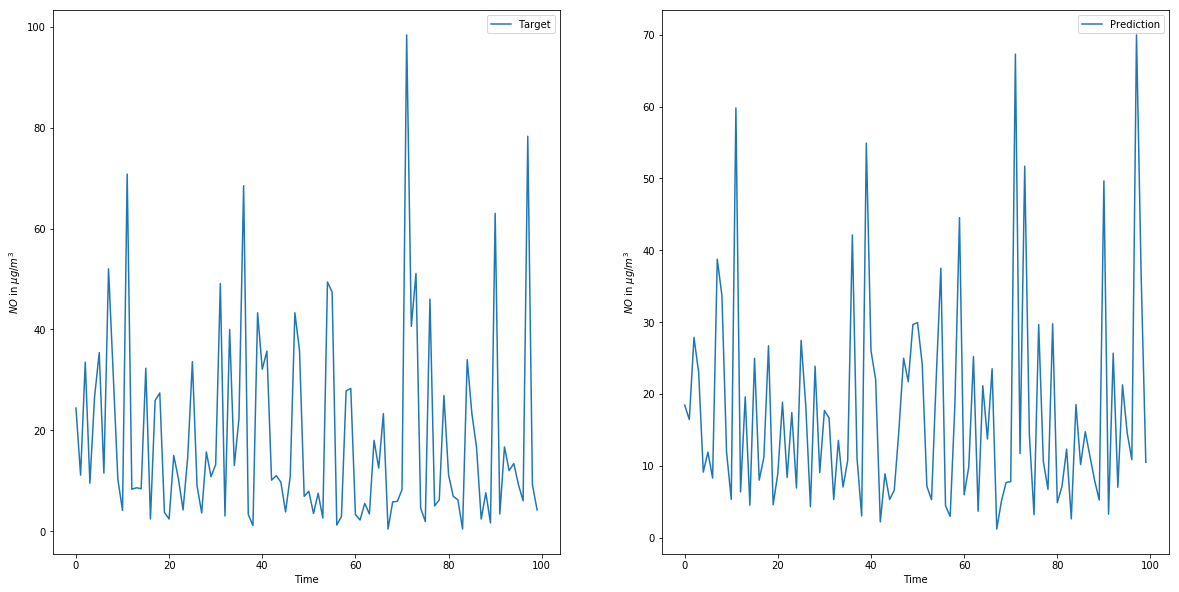

In [118]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(np.arange(0,100),test_label[:100], label = 'Target')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('$NO$ in $\mu g / m^3$')

ax2.plot(np.arange(0,100),RFR.predict(test_data[:100]), label = 'Prediction')
ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('$NO$ in $\mu g / m^3$')

plt.show()

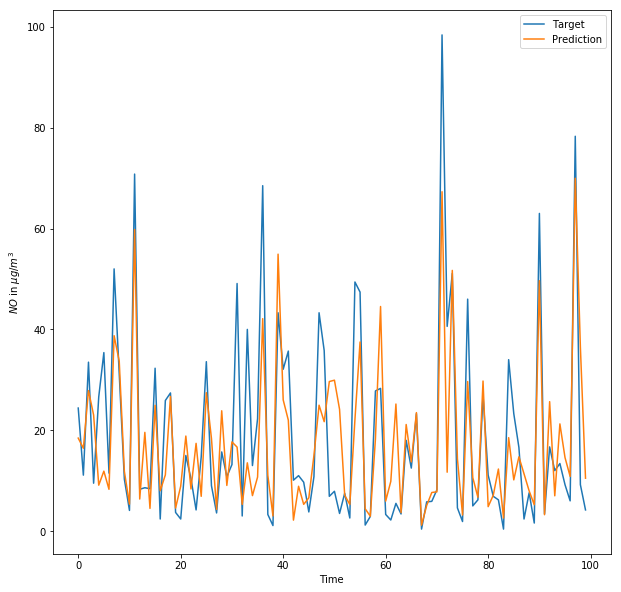

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))

plt.plot(np.arange(0,100),test_label[:100], label = 'Target')
plt.xlabel('Time')
plt.ylabel('$NO$ in $\mu g / m^3$')

plt.plot(np.arange(0,100),RFR.predict(test_data[:100]), label = 'Prediction')
plt.legend()
plt.show()

In [103]:
RFR.predict(np.array([np.zeros(len(train_data.columns))]))

array([ 60.73])

Baseline for zero entries.

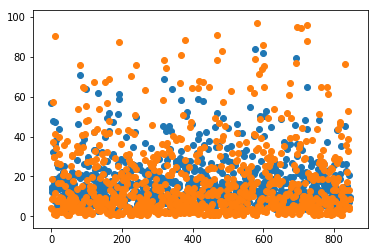

In [20]:
plt.scatter(np.arange(0,test_data.shape[0]),RFR.predict(test_data))
plt.scatter(np.arange(0,test_data.shape[0]),test_label)
plt.show()

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
train_data, test_data, train_label, test_label = train_test_split(dg[data_col], dg[label_col[0]], test_size = 0.2)
# uncomment the following line to visualize your results

In [26]:

RFR = RandomForestRegressor(n_estimators = 10)
RFR.fit(train_data, train_label)


perm = PermutationImportance(RFR, random_state=1).fit(test_data, test_label)

In [27]:
eli5.show_weights(perm, feature_names = test_data.columns.tolist())

Weight,Feature
0.2216 ± 0.0382,18948001
0.2103 ± 0.0287,17394003
0.0482 ± 0.0131,399126819
0.0281 ± 0.0162,17404002
0.0248 ± 0.0282,18887020
0.0230 ± 0.0084,17390004
0.0207 ± 0.0043,15427004
0.0197 ± 0.0121,15436001
0.0178 ± 0.0183,Wind_Ost_d
0.0167 ± 0.0053,17453012


In [29]:
la.loc[la.ElemUID.isin(['18948001','17394003']), 'Distance_Fried']

127    5880.178052
199    2952.396727
Name: Distance_Fried, dtype: float64

# Spatial considerations